# Student Analysis

#
The data provided contain scores of each student in each asignature through four periods of evaluation. The superiors and parents need to know if some of the students need help with one or more asignatures or if she or he need especial treatment according its situation.

It is obvious that some students score very low in some cases. If data isn't normal that means we have outliers. Outliers students tell us a signal that the student need some kind of help or atention. Perhaps teachers are the problem too? Also, the data tell us about performance in each asignature and that reflects some kind of performance of teacher.

The values less than 60 are fail in that period of evaluation. 

## Preamble

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
import plotly.express as px

In [2]:
# import data
data = 'final_scores.csv'
scores = pd.read_csv(data)

In [3]:
# check NaN values
print(scores.isnull().sum())

STUDENT       0
EVALUATION    0
COURSE        0
SCORE         0
GENDER        0
dtype: int64


In [4]:
# check duplicates rows
print(scores.duplicated().sum())

0


In [5]:
# check types of each column
print(scores.dtypes)

STUDENT       object
EVALUATION    object
COURSE        object
SCORE          int64
GENDER        object
dtype: object


In [6]:
# DataFrame view
scores.head()

,STUDENT,EVALUATION,COURSE,SCORE,GENDER
0,STUDENT1,PERIOD1,MATH,87,FEMALE
1,STUDENT2,PERIOD1,MATH,79,MALE
2,STUDENT3,PERIOD1,MATH,100,FEMALE
3,STUDENT4,PERIOD1,MATH,95,MALE
4,STUDENT5,PERIOD1,MATH,100,FEMALE


## General group details

In [7]:
# female and male counts
scores['GENDER'][(scores['COURSE']=='MATH')].value_counts()//4

FEMALE    19
MALE      12
Name: GENDER, dtype: int64

In [8]:
# summary statistics per gender
scores.groupby('GENDER')['SCORE'].describe()

,count,mean,std,min,25%,50%,75%,max
GENDER,,,,,,,,
FEMALE,608.0,93.570724,10.975107,40.0,91.0,100.0,100.0,100.0
MALE,384.0,93.020833,9.619095,50.0,90.0,97.0,100.0,100.0


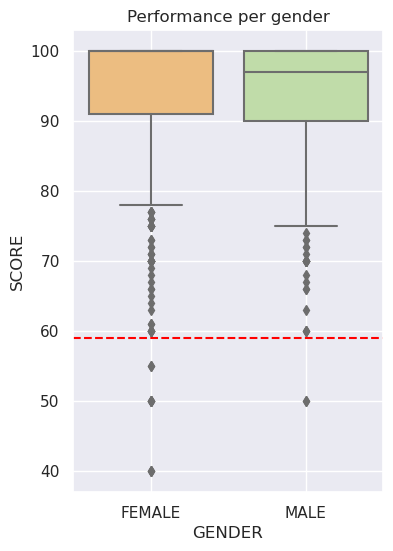

In [26]:
# boxplots per gender
sns.set()
plt.rcParams["figure.figsize"] = [4, 6]
fig, ax = plt.subplots()
ax.axhline(59, ls='--', c='red')
sns.boxplot(y='SCORE', x='GENDER', 
            data=scores, 
            palette="Spectral"
           ).set(title='Performance per gender')
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.show()

#
We can see that females and males are pretty similar since both genders present outliers around 75 points. However, females tend to have highest scores.

In [23]:
# general performance
scores.describe()

,SCORE
count,992.000000
mean,93.357863
std,10.469501
min,40.000000
25%,90.000000
50%,100.000000
75%,100.000000
max,100.000000


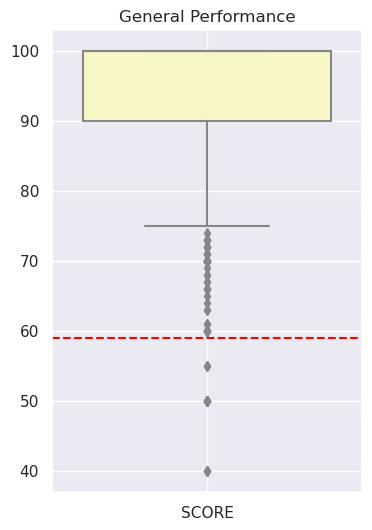

In [25]:
# boxplot whole students
# sns.set()
plt.rcParams["figure.figsize"] = [4, 6]
fig, ax = plt.subplots()
ax.axhline(59, ls='--', c='red')
sns.boxplot( 
            data=scores, 
            palette="Spectral"
           ).set(title='General Performance')
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.show()

#
Since mean value is different from median we need to compare both of them to see in how many asignatures students are weaker.

In [27]:
# performance per asignature (highest to lower arithmetic mean)
scores.groupby('COURSE')['SCORE'].describe(
    include='all').sort_values('mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
COURSE,,,,,,,,
SPORT,124.0,98.306452,5.015711,70.0,100.00,100.0,100.0,100.0
ARTS,124.0,96.895161,8.229254,60.0,100.00,100.0,100.0,100.0
HISTORY,124.0,95.862903,6.750290,50.0,95.00,98.0,100.0,100.0
LITERATURE,124.0,94.612903,9.363230,50.0,92.00,100.0,100.0,100.0
BIOLOGY,124.0,94.451613,7.561514,60.0,91.75,96.5,100.0,100.0
ENGLISH,124.0,91.379032,10.108028,50.0,85.75,95.0,100.0,100.0
MATH,124.0,89.572581,12.178332,50.0,80.00,94.0,100.0,100.0
PHYSICS,124.0,85.782258,15.055756,40.0,76.75,91.0,100.0,100.0


In [28]:
# performance per asignature (highest to lower median)
scores.groupby('COURSE')['SCORE'].describe(
    include='all').sort_values('50%', ascending=False)

,count,mean,std,min,25%,50%,75%,max
COURSE,,,,,,,,
ARTS,124.0,96.895161,8.229254,60.0,100.00,100.0,100.0,100.0
LITERATURE,124.0,94.612903,9.363230,50.0,92.00,100.0,100.0,100.0
SPORT,124.0,98.306452,5.015711,70.0,100.00,100.0,100.0,100.0
HISTORY,124.0,95.862903,6.750290,50.0,95.00,98.0,100.0,100.0
BIOLOGY,124.0,94.451613,7.561514,60.0,91.75,96.5,100.0,100.0
ENGLISH,124.0,91.379032,10.108028,50.0,85.75,95.0,100.0,100.0
MATH,124.0,89.572581,12.178332,50.0,80.00,94.0,100.0,100.0
PHYSICS,124.0,85.782258,15.055756,40.0,76.75,91.0,100.0,100.0


In [29]:
# performance per asignature (highest to lower standard deviation)
scores.groupby('COURSE')['SCORE'].describe(
    include='all').sort_values('std', ascending=False)

,count,mean,std,min,25%,50%,75%,max
COURSE,,,,,,,,
PHYSICS,124.0,85.782258,15.055756,40.0,76.75,91.0,100.0,100.0
MATH,124.0,89.572581,12.178332,50.0,80.00,94.0,100.0,100.0
ENGLISH,124.0,91.379032,10.108028,50.0,85.75,95.0,100.0,100.0
LITERATURE,124.0,94.612903,9.363230,50.0,92.00,100.0,100.0,100.0
ARTS,124.0,96.895161,8.229254,60.0,100.00,100.0,100.0,100.0
BIOLOGY,124.0,94.451613,7.561514,60.0,91.75,96.5,100.0,100.0
HISTORY,124.0,95.862903,6.750290,50.0,95.00,98.0,100.0,100.0
SPORT,124.0,98.306452,5.015711,70.0,100.00,100.0,100.0,100.0


#
As we see, physics is the most difficult to students, follow by math and english class.

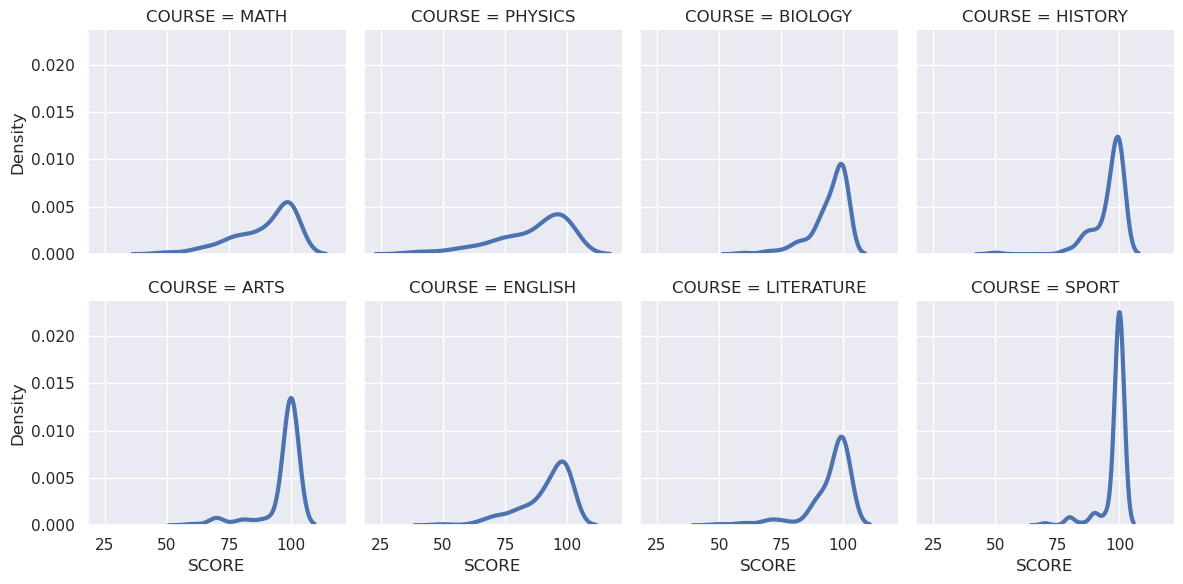

In [32]:
# KDE plots for scores in each asignature
sns.set_theme(style="darkgrid")
sns.displot(
    scores, x="SCORE", 
    col="COURSE", 
    col_wrap=4, 
    height=3,
    kind='kde',
    linewidth = 3
)

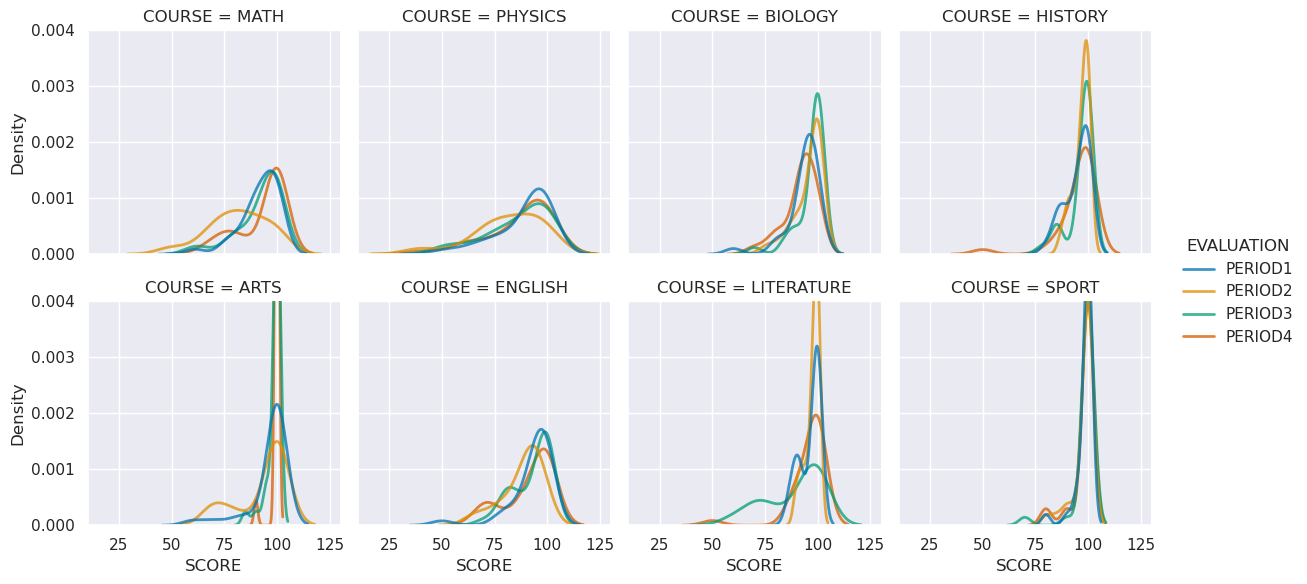

In [33]:
# KDE plots for scores in each asignature per period
sns.set_theme(style="darkgrid")
ax = sns.displot(
    scores, x="SCORE", col="COURSE", col_wrap=4, hue="EVALUATION",
     height=3 ,kind="kde",linewidth = 2, palette="colorblind",alpha=0.75
)
plt.ylim(0,0.004)
plt.show()

In [40]:
# Radar for final scores per asignature
fig = px.line_polar(scores.groupby('COURSE').mean().reset_index(), 
                    r='SCORE', theta='COURSE', line_close=True, 
                    markers=True, template="seaborn", width=500,
                    title='Average per Asignature')
fig.show()

/tmp/ipykernel_37666/2630980370.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

/home/camus/anaconda3/lib/python3.10/site-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



/tmp/ipykernel_37666/1266569649.py:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



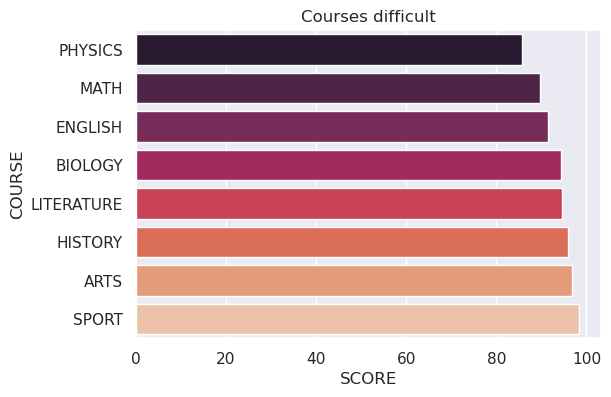

In [43]:
# barplot with final scores in each asignature
plt.rcParams["figure.figsize"] = [6, 4]
sns.barplot(data=scores.groupby('COURSE').mean().reset_index().sort_values('SCORE'), 
            x="SCORE", y="COURSE", 
            palette="rocket").set(title='Courses difficult')
plt.show()

In [44]:
# final scores per piriod
evolucion_COURSEs = scores.groupby(['COURSE','EVALUATION']).mean().reset_index()

/tmp/ipykernel_37666/2162842642.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [45]:
num_COURSEs = len(evolucion_COURSEs[evolucion_COURSEs['EVALUATION']=='EVALUATION1'].index) 

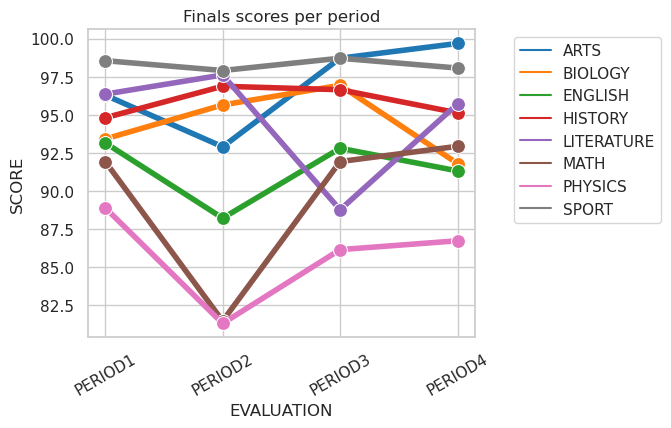

In [49]:
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = [5,4]
plt.xticks(rotation=30)
ax = sns.lineplot(data=evolucion_COURSEs, 
             x="EVALUATION", y="SCORE",hue='COURSE', 
             marker="o", markersize=10,linewidth = 4, palette="tab10")
# ax.legend(bbox_to_anchor = (1.5, 1),fontsize = 12).get_lines()[0].set_linewidth(4)
ax.legend(bbox_to_anchor = (1.5, 1))
ax.set(title='Finals scores per period')
plt.show()

In [51]:
fig = px.line_polar(scores.groupby(['COURSE','EVALUATION']).mean().reset_index(), 
                    r='SCORE', theta='COURSE',color='EVALUATION', 
                    line_close=True,markers=True,template="seaborn", width=700,
                    title='Radar per period')
fig.show()

/tmp/ipykernel_37666/3660700134.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

/home/camus/anaconda3/lib/python3.10/site-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/camus/anaconda3/lib/python3.10/site-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/camus/anaconda3/lib/python3.10/site-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/camus/anaconda3/lib/python3.10/site-packages/plotly/express/_core.py:271

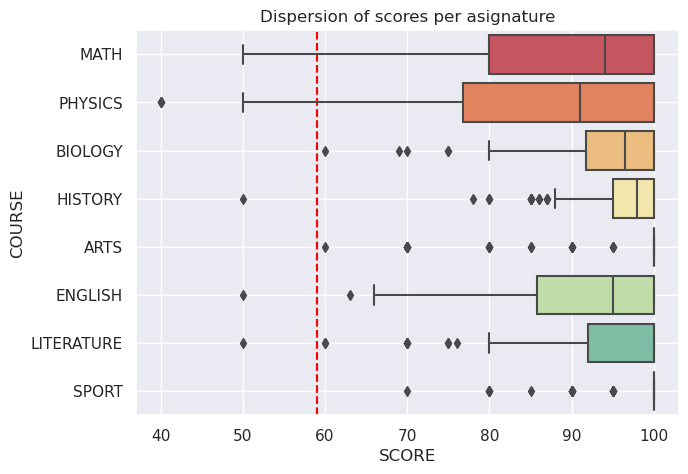

In [56]:
# boxplot per asignature
sns.set()
plt.rcParams["figure.figsize"] = [7, 5]
fig, ax = plt.subplots()
plt.yticks(np.arange(min(scores['SCORE']), 
                     max(scores['SCORE'])+1, 10))
plt.axvline(59, ls='--', c='red')
sns.boxplot(y='COURSE', x='SCORE', 
            data=scores, palette="Spectral").set(title='Dispersion of scores per asignature')
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.show()

/tmp/ipykernel_37666/2790431435.py:8: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



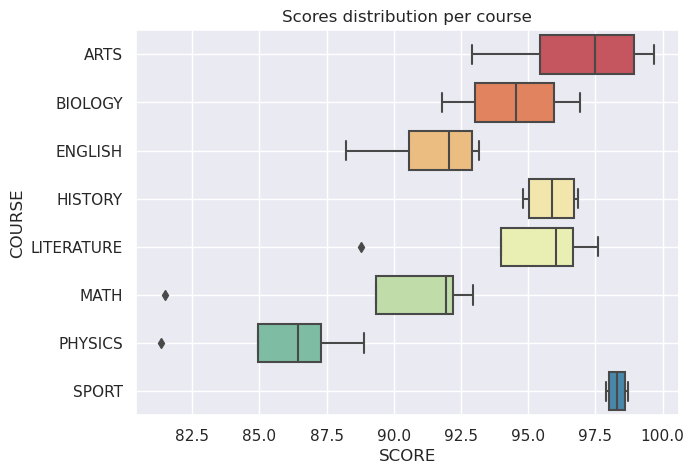

In [59]:
# boxplot scores distribution per course
sns.set()
plt.rcParams["figure.figsize"] = [7, 5]
fig, ax = plt.subplots()
plt.yticks(np.arange(min(scores['SCORE']), 
                     max(scores['SCORE'])+1, 10))
sns.boxplot(y='COURSE', x='SCORE', 
            data=scores.groupby(['COURSE','EVALUATION']).mean().reset_index(), 
            palette="Spectral").set(title='Scores distribution per course')
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.show()

/tmp/ipykernel_37666/2132598044.py:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



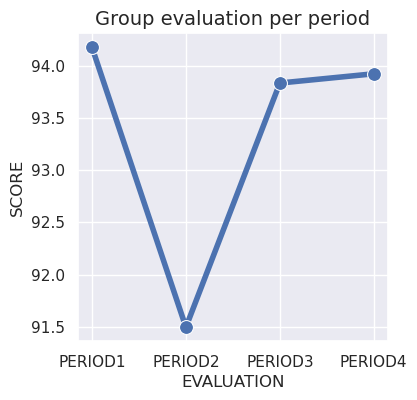

In [64]:
# evolution of whole group (mean)
plt.rcParams["figure.figsize"] = [4,4]
sns.lineplot(data=scores.groupby('EVALUATION').mean().reset_index(), 
             x="EVALUATION", y="SCORE", marker="o", markersize=10,linewidth = 4)
plt.title(label='Group evaluation per period',
          fontsize=14)
plt.show()

/tmp/ipykernel_37666/242597989.py:4: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



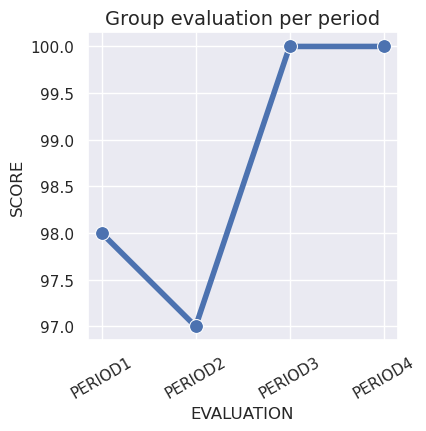

In [65]:
# evolution of whole group (median)
plt.rcParams["figure.figsize"] = [4,4]
plt.xticks(rotation=30)
sns.lineplot(data=scores.groupby('EVALUATION').median().reset_index(), 
             x="EVALUATION", y="SCORE", marker= 'o', markersize=10,linewidth = 4)
plt.title(label='Group evaluation per period',
          fontsize=14)
plt.show()

[Text(0.5, 1.0, 'Scores distribution per period')]

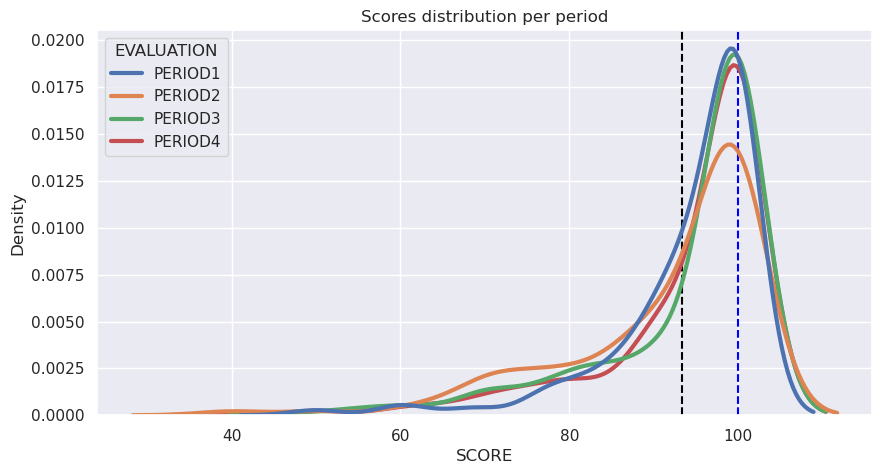

In [66]:
# Scores distribution per period
plt.rcParams["figure.figsize"] = [10, 5]
plt.axvline(scores['SCORE'].mean(), ls='--', c='black')
plt.axvline(scores['SCORE'].median(), ls='--', c='blue')
sns.kdeplot(data=scores, x="SCORE", 
            hue="EVALUATION",
            linewidth = 3).set(title='Scores distribution per period')

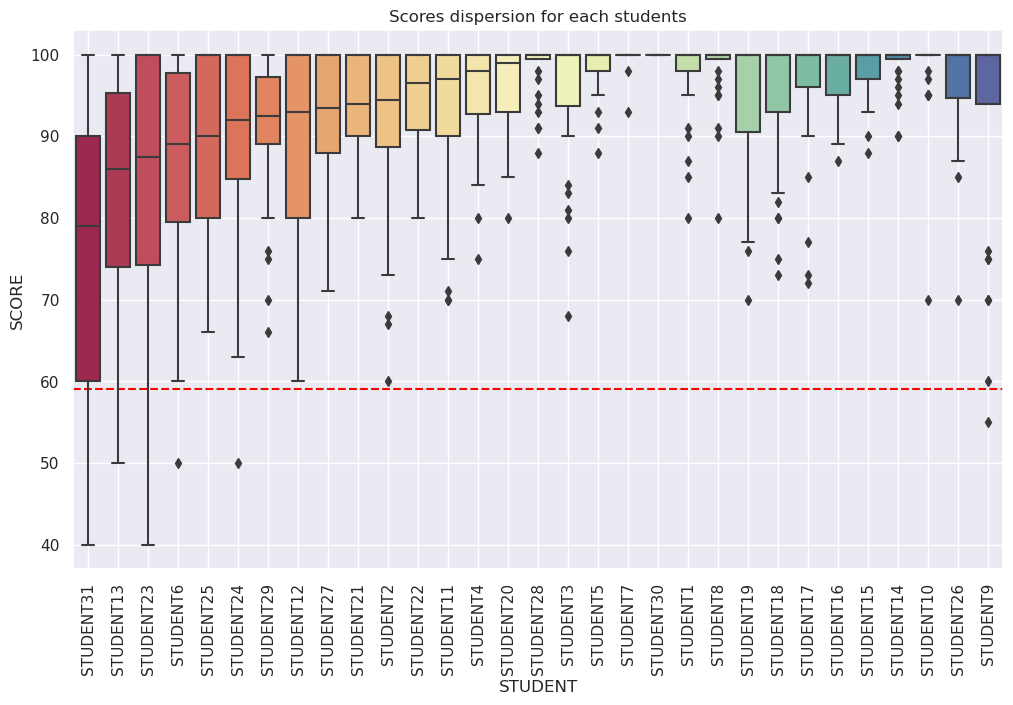

In [70]:
# Scores dispersion for each students
sns.set()
plt.rcParams["figure.figsize"] = [12, 7]
fig, ax = plt.subplots()

grouped = scores.loc[:,['STUDENT', 'SCORE']] \
    .groupby(['STUDENT']) \
    .median() \
    .sort_values(by='SCORE')

plt.yticks(np.arange(min(scores['SCORE']), 
                     max(scores['SCORE'])+1, 10))
plt.axhline(59, ls='--', c='red')
sns.boxplot(x='STUDENT', y='SCORE', 
            data=scores, palette="Spectral", 
            order=grouped.index).set(title='Scores dispersion for each students')
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.xticks(rotation=90)
plt.show()

In [71]:
# create new dataframe to final scores
promedios_semestral = scores.groupby('STUDENT')['SCORE'].mean().reset_index()

[Text(0.5, 1.0, 'Averages Distribution')]

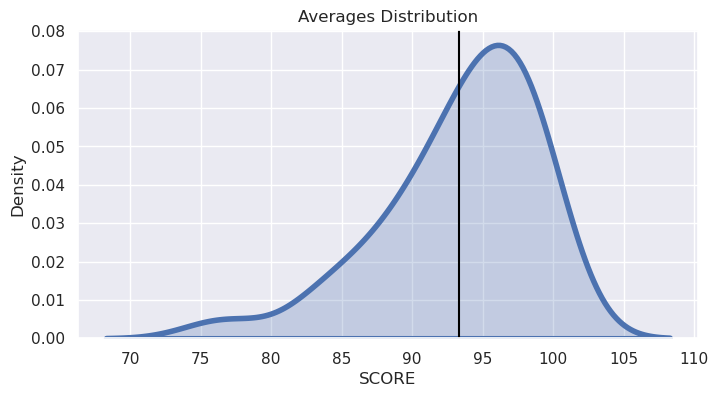

In [75]:
# KDE plot distribution
plt.rcParams["figure.figsize"] = [8, 4]
plt.axvline(promedios_semestral['SCORE'].mean(), ls='-', c='black')
sns.kdeplot(data=promedios_semestral, x="SCORE", 
            fill=True,linewidth = 4).set(title='Averages Distribution')

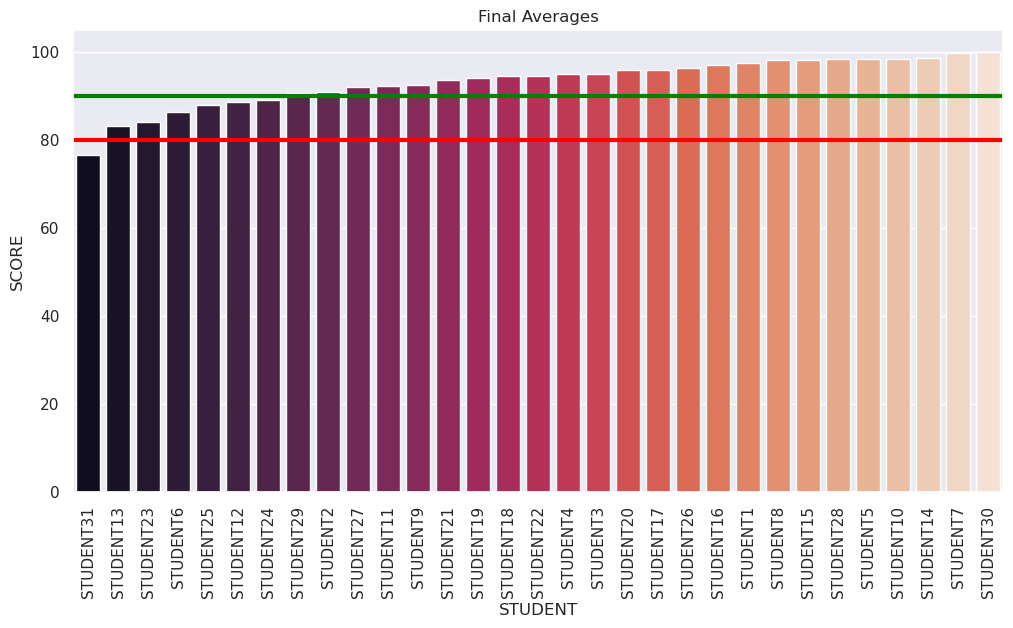

In [78]:
# grafico de barras para promedios
plt.rcParams["figure.figsize"] = [12, 6]
plt.axhline(90, ls='-', c='green', linewidth=3)
plt.axhline(80, ls='-', c='red', linewidth=3)
sns.barplot(data=promedios_semestral.sort_values('SCORE'), y="SCORE", 
            x="STUDENT", palette="rocket").set(title='Final Averages')
plt.xticks(rotation=90)
plt.show()

In [79]:
# radar final averages
fig = px.line_polar(promedios_semestral.sort_values('SCORE',ascending=False), r='SCORE', theta='STUDENT', 
                    line_close=True,markers=True,template="seaborn", width=700,
                    title='Promedios Semestrales de Alumn@s')
fig.update_traces(
                  mode="lines+markers", line_color='gray',
                  marker=dict(color='black', size=6, symbol='square'))
fig.show()

/home/camus/anaconda3/lib/python3.10/site-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [81]:
# radar averages per period
fig = px.line_polar(scores.groupby(['STUDENT','EVALUATION']).mean().reset_index(), 
                    r='SCORE', theta='STUDENT',color='EVALUATION', 
                    line_close=True,markers=True,template="seaborn", width=700,
                    title='Averages per period')
fig.show()

/tmp/ipykernel_37666/3095306738.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

/home/camus/anaconda3/lib/python3.10/site-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/camus/anaconda3/lib/python3.10/site-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/camus/anaconda3/lib/python3.10/site-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/camus/anaconda3/lib/python3.10/site-packages/plotly/express/_core.py:271

In [83]:
# create a dataframe of averages per asignature for each student
avg_alumno_COURSE = scores.groupby(['STUDENT', 'COURSE']).mean().reset_index()

/tmp/ipykernel_37666/777360707.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [84]:
# alumn@s con COURSE reprobada por promedio
avg_alumno_COURSE[avg_alumno_COURSE['SCORE']<60]

,STUDENT,COURSE,SCORE
126,STUDENT23,PHYSICS,57.0
198,STUDENT31,PHYSICS,54.0


## Particular cases

In [85]:
segundo_A = list(scores[(scores['EVALUATION']=='EVALUATION1') & (scores['COURSE']=='MATH')]['STUDENT'])
lista_alumnos = list(promedios_semestral[(promedios_semestral['SCORE'] < 80)].sort_values('SCORE',ascending=False).STUDENT)

In [86]:
nombre = 'STUDENT31'
alumno_scores = scores[scores['STUDENT']==nombre]

In [87]:
alumno_scores.groupby('COURSE')['SCORE'].describe(include='all').sort_values('mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
COURSE,,,,,,,,
SPORT,4.0,98.75,2.500000,95.0,98.75,100.0,100.00,100.0
ENGLISH,4.0,92.75,6.601767,85.0,88.75,93.0,97.00,100.0
ARTS,4.0,77.50,15.000000,60.0,67.50,80.0,90.00,90.0
HISTORY,4.0,76.00,17.981472,50.0,71.00,82.5,87.50,89.0
BIOLOGY,4.0,75.50,7.047458,69.0,69.75,75.0,80.75,83.0
LITERATURE,4.0,72.25,20.532495,50.0,57.50,73.0,87.75,93.0
MATH,4.0,65.75,13.073510,50.0,57.50,68.0,76.25,77.0
PHYSICS,4.0,54.00,9.695360,40.0,51.25,57.5,60.25,61.0


/tmp/ipykernel_37666/939623173.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

/tmp/ipykernel_37666/939623173.py:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




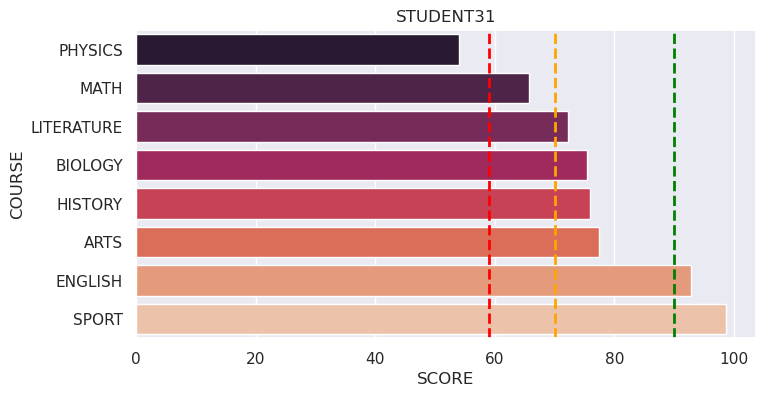

In [90]:
plt.rcParams["figure.figsize"] = [8, 4]
sns.barplot(data=alumno_scores.groupby('COURSE').mean().reset_index().sort_values('SCORE'), x="SCORE", 
            y="COURSE", palette="rocket", ci=None).set(title=nombre)
plt.axvline(59, ls='--', c='red', linewidth=2)
plt.axvline(90, ls='--', c='green', linewidth=2)
plt.axvline(70, ls='--', c='orange', linewidth=2)
plt.show()

[Text(0.5, 1.0, 'STUDENT31')]

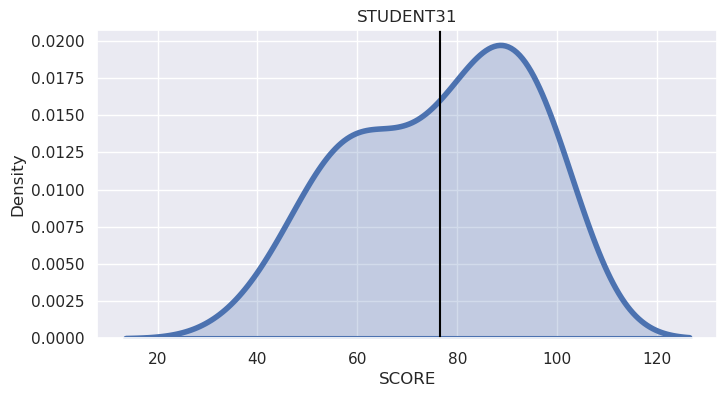

In [91]:
plt.rcParams["figure.figsize"] = [8, 4]
plt.axvline(alumno_scores['SCORE'].mean(), ls='-', c='black')
sns.kdeplot(data=alumno_scores, x="SCORE", 
            fill=True,linewidth = 4).set(title=nombre)

[Text(0.5, 1.0, 'STUDENT31')]

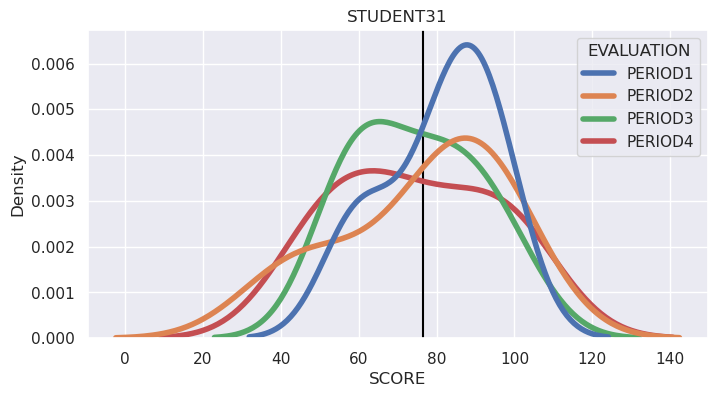

In [92]:
plt.rcParams["figure.figsize"] = [8, 4]
plt.axvline(alumno_scores['SCORE'].mean(), ls='-', c='black')
sns.kdeplot(data=alumno_scores, x="SCORE", hue="EVALUATION", 
            fill=False,linewidth = 4).set(title=nombre)

In [93]:
fig = px.line_polar(alumno_scores.groupby(['COURSE','EVALUATION']).mean().reset_index(), 
                    r='SCORE', theta='COURSE',color='EVALUATION', 
                    line_close=True,markers=True,template='presentation', width=700,
                    title=nombre)
fig.show()

/tmp/ipykernel_37666/3488271846.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

/home/camus/anaconda3/lib/python3.10/site-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/camus/anaconda3/lib/python3.10/site-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/camus/anaconda3/lib/python3.10/site-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/camus/anaconda3/lib/python3.10/site-packages/plotly/express/_core.py:271

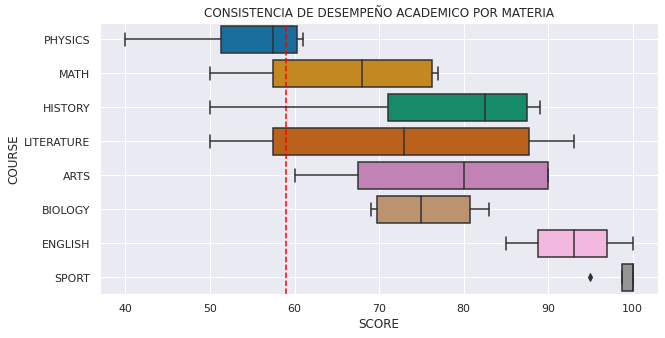

In [ ]:
# consistencia en el desempeño semestral por alumn@
sns.set()
plt.rcParams["figure.figsize"] = [10, 5]
fig, ax = plt.subplots()

plt.style.use('seaborn-deep')
plt.yticks(np.arange(min(alumno_scores['SCORE']), 
                     max(alumno_scores['SCORE'])+1, 10))
plt.axvline(59, ls='--', c='red')
sns.boxplot(y='COURSE', x='SCORE', 
            data=alumno_scores.sort_values('SCORE'), 
            palette="colorblind").set(title='CONSISTENCIA DE DESEMPEÑO ACADEMICO POR MATERIA')
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.show()